# Deep Learning HW2 - Problem 2
### Ehsan Sharifian 400201529

---

## Part a

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)
dir = "/content/drive/MyDrive/"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(dir + 'Deep Learning/HW02/Question2/international_matches.csv')
df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


## Part b


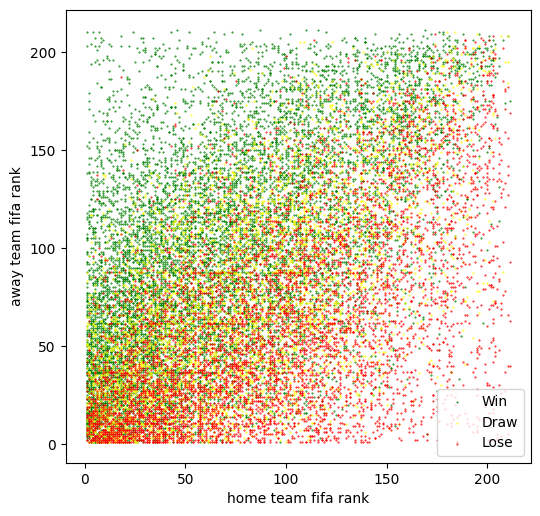

In [ ]:
plt.figure(figsize=(6, 6), dpi = 100)

x_win = np.array(df[df['home_team_result'] == 'Win']['home_team_fifa_rank'])
y_win = np.array(df[df['home_team_result'] == 'Win']['away_team_fifa_rank'])
x_draw = np.array(df[df['home_team_result'] == 'Draw']['home_team_fifa_rank'])
y_draw = np.array(df[df['home_team_result'] == 'Draw']['away_team_fifa_rank'])
x_lose = np.array(df[df['home_team_result'] == 'Lose']['home_team_fifa_rank'])
y_lose = np.array(df[df['home_team_result'] == 'Lose']['away_team_fifa_rank'])

plt.scatter(x_win, y_win , s=0.2, color='green', label='Win')
plt.scatter(x_draw, y_draw , s=0.2, color='yellow', label='Draw')
plt.scatter(x_lose, y_lose , s=0.2, color='red', label='Lose')

plt.legend()
plt.xlabel('home team fifa rank')
plt.ylabel('away team fifa rank')
plt.show()

## Part c


In [ ]:
df = df[(df['home_team_total_fifa_points'] != 0) & (df['away_team_total_fifa_points'] != 0)]
df = df[["home_team_fifa_rank", "away_team_fifa_rank", "home_team_total_fifa_points", "away_team_total_fifa_points", "home_team_result"]]

df['home_team_result'] = df['home_team_result'].replace(['Win', 'Draw', 'Lose'], [2, 1, 0])
df = df.sample(frac=1)

train_df = df[: int(0.75 * len(df))]
test_df = df[int(0.75 * len(df)):]

## Part d

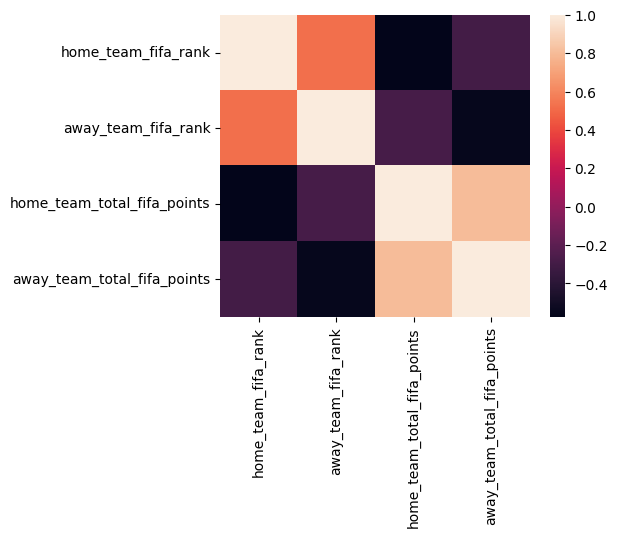

In [ ]:
plt.figure(figsize=(5, 4), dpi = 100)
sns.heatmap(df[["home_team_fifa_rank", "away_team_fifa_rank", "home_team_total_fifa_points", "away_team_total_fifa_points"]].corr());
plt.show()

## Part e

In [ ]:
import torch.nn as nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8, 3),
        )
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

## Part f

In [ ]:
# Creating a Custom Dataset
import pandas as pd
from torch.utils.data import Dataset 

device = "cuda" if torch.cuda.is_available() else "cpu"

class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None, target_transform=None):
        self.data = dataframe[["home_team_fifa_rank", "away_team_fifa_rank", "home_team_total_fifa_points", "away_team_total_fifa_points"]]
        self.targets = dataframe["home_team_result"]
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        data = torch.tensor(self.data.iloc[idx]).to(device).float()
        target = torch.tensor(self.targets.iloc[idx]).to(device)
        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            target = self.target_transform(target)
        return data, target

In [ ]:
from torch.utils.data import DataLoader

learning_rate = 1e-3
batch_size = 16

training_data = CustomDataset(train_df)
test_data = CustomDataset(test_df)
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

model = NeuralNetwork().to(device)
model.train()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 5.955851  [    0/ 7195]
loss: 1.049435  [ 1600/ 7195]
loss: 0.964586  [ 3200/ 7195]
loss: 0.879853  [ 4800/ 7195]
loss: 0.857447  [ 6400/ 7195]
Test Error: 
 Accuracy: 55.7%, Avg loss: 0.950195 

Epoch 2
-------------------------------
loss: 0.895201  [    0/ 7195]
loss: 0.826515  [ 1600/ 7195]
loss: 0.905771  [ 3200/ 7195]
loss: 0.933486  [ 4800/ 7195]
loss: 0.749364  [ 6400/ 7195]
Test Error: 
 Accuracy: 56.1%, Avg loss: 0.944962 

Epoch 3
-------------------------------
loss: 0.959090  [    0/ 7195]
loss: 0.959063  [ 1600/ 7195]
loss: 0.739073  [ 3200/ 7195]
loss: 1.079665  [ 4800/ 7195]
loss: 0.891491  [ 6400/ 7195]
Test Error: 
 Accuracy: 55.9%, Avg loss: 0.948828 

Epoch 4
-------------------------------
loss: 0.569748  [    0/ 7195]
loss: 1.015719  [ 1600/ 7195]
loss: 1.033760  [ 3200/ 7195]
loss: 1.019856  [ 4800/ 7195]
loss: 1.326303  [ 6400/ 7195]
Test Error: 
 Accuracy: 56.0%, Avg loss: 0.945711 

Epoch 5
------------------------

## Part g

In [ ]:
Iran_fifa_rank = 24
England_fifa_rank = 5
USA_fifa_rank = 13
Wales_fifa_rank = 28

ranks = [Iran_fifa_rank,England_fifa_rank,USA_fifa_rank,Wales_fifa_rank]

Iran_total_fifa_points = 1551.73
England_total_fifa_points = 1774.19
USA_total_fifa_points = 1652.74
Wales_total_fifa_points = 1530.28

fifa_points = [Iran_total_fifa_points,England_total_fifa_points,USA_total_fifa_points,Wales_total_fifa_points]

data = []
for i in range(1,4):
  data.append([ranks[0],ranks[i],fifa_points[0],fifa_points[i]])
  data.append([ranks[i],ranks[0],fifa_points[i],fifa_points[0]])
X_batch = torch.tensor(data)
Y_batch = model(X_batch).argmax(1)

team_list = ['England', 'USA', 'Wales']

for i in range(6):
  if (i % 2 == 0):
    if (Y_batch[i].item() == 0):
      print(f"Iran (home) loses {team_list[i//2]} (away).")
    elif (Y_batch[i].item() == 1):
      print(f"Iran (home) draws {team_list[i//2]} (away).")
    elif (Y_batch[i].item() == 2):
      print(f"Iran (home) wins {team_list[i//2]} (away).")
  if(i % 2 == 1):
    if (Y_batch[i].item() == 0):
      print(f"{team_list[i//2]} (home) loses Iran (away).")
    elif (Y_batch[i].item() == 1):
      print(f"{team_list[i//2]} (home) draws Iran (away).")
    elif (Y_batch[i].item() == 2):
      print(f"{team_list[i//2]} (home) wins Iran (away).")

Iran (home) loses England (away).
England (home) wins Iran (away).
Iran (home) wins USA (away).
USA (home) wins Iran (away).
Iran (home) wins Wales (away).
Wales (home) wins Iran (away).
